In [157]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report


In [158]:
df = pd.read_csv('heart.csv')

In [159]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [160]:
df.shape

(918, 12)

In [161]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [162]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [163]:
df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})

In [164]:
cat_to_dummie = ['ChestPainType', 'RestingECG', 'ST_Slope' ]

In [165]:
df = pd.get_dummies(data = df, prefix = cat_to_dummie, columns = cat_to_dummie )

In [166]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


In [167]:
df.nunique()

Age                   50
Sex                    2
RestingBP             67
Cholesterol          222
FastingBS              2
MaxHR                119
ExerciseAngina         2
Oldpeak               53
HeartDisease           2
ChestPainType_ASY      2
ChestPainType_ATA      2
ChestPainType_NAP      2
ChestPainType_TA       2
RestingECG_LVH         2
RestingECG_Normal      2
RestingECG_ST          2
ST_Slope_Down          2
ST_Slope_Flat          2
ST_Slope_Up            2
dtype: int64

In [168]:
df.shape

(918, 19)

In [169]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [170]:
y.value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

In [171]:
RANDOM_STATE = 42
X_train , X_, y_train, y_ = train_test_split(X,y, test_size  = 0.4, random_state = RANDOM_STATE,stratify=y)
X_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = RANDOM_STATE,stratify=y_)

del X_, y_

 ## **Random Forest Baseline**

In [172]:
model = RandomForestClassifier(random_state = RANDOM_STATE)
model.fit(X_train, y_train)

train_predict = model.predict(X_train)
cv_predict = model.predict(X_cv)

In [173]:
rf_training_accuracy = accuracy_score(train_predict, y_train)
rf_cv_accuracy = accuracy_score(cv_predict, y_cv)

print(f" Training accuracy: {rf_training_accuracy:.3f}\n CV accuracy: {rf_cv_accuracy:.3f}")


 Training accuracy: 1.000
 CV accuracy: 0.891


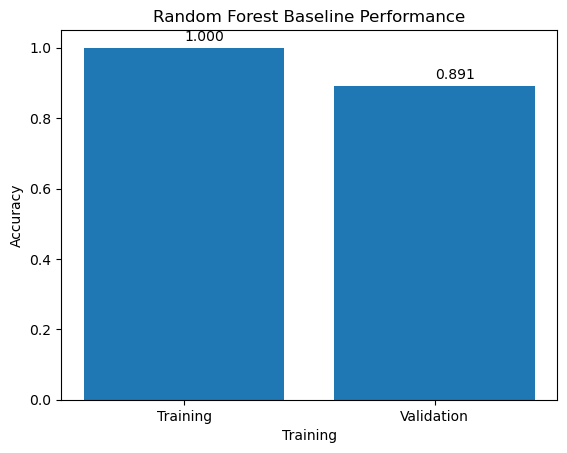

In [174]:
labels = ['Training', 'Validation']
scores = [rf_training_accuracy, rf_cv_accuracy]

plt.bar(labels, scores)

plt.title('Random Forest Baseline Performance')
plt.xlabel('Training')
plt.ylabel("Accuracy")

for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.3f}")
plt.show()

We can observe high variance, as the training accuracy is perfect and significantly higher than the validation accuracy, indicating that the model overfits the training data.

In [175]:
print(classification_report(y_cv, cv_predict))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



## **XGBOOST Baseline**

In [176]:
model = XGBClassifier(random_state = RANDOM_STATE)
model.fit(X_train, y_train)

training_predict = model.predict(X_train)
cv_predict = model.predict(X_cv)

In [177]:
xgb_training_accuracy = accuracy_score(train_predict, y_train)
xgb_cv_accuracy = accuracy_score(cv_predict, y_cv)

print(f" Training accuracy: {xgb_training_accuracy:.3f}\n CV accuracy: {xgb_cv_accuracy:.3f}")

 Training accuracy: 1.000
 CV accuracy: 0.902


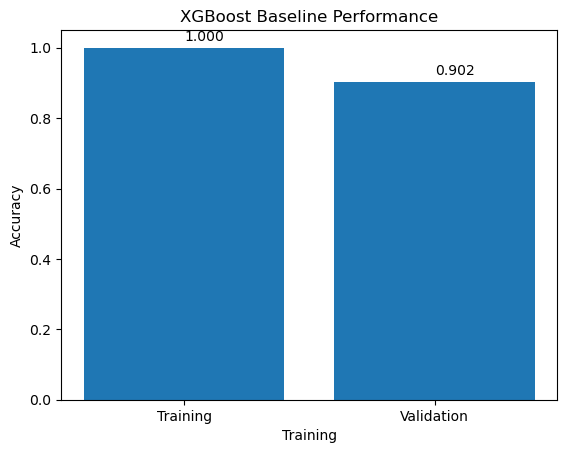

In [178]:
labels = ['Training', 'Validation']
scores = [xgb_training_accuracy, xgb_cv_accuracy]

plt.bar(labels, scores)

plt.title('XGBoost Baseline Performance')
plt.xlabel('Training')
plt.ylabel("Accuracy")

for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.3f}")
plt.show()

Here we observe the same pattern. The training accuracy is perfect, while the validation accuracy is significantly lower, indicating that the model overfits the training data.

In [179]:
print(classification_report(y_cv, cv_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        82
           1       0.93      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



## **Random Forest Tuned**

In [180]:
rf = RandomForestClassifier(random_state= RANDOM_STATE)

In [140]:
params = {
    "n_estimators": [100, 200,300,500],
    "max_depth": [1,3, 5],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,
    scoring="recall",   
    n_jobs=-1
)

grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [1, 3, ...], 'min_samples_leaf': [1, 5], 'min_samples_split': [2, 10], 'n_estimators': [100, 200, ...]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [141]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [142]:
grid.best_score_

np.float64(0.9080874316939891)

With the tuned parameters we can see that the model gets a higher cv score.

In [143]:
rf_tuned = grid.best_estimator_

In [144]:
y_predict = rf_tuned.predict(x_test)

In [145]:
print(confusion_matrix(y_test, y_predict))

[[65 17]
 [ 7 95]]


In [146]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        82
           1       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



We can see that the model performs better on the ‘1’ label than on the ‘0’ label, it achieved higher precision, recall, and F1-score. The overall accuracy of the model is 86%.

In [147]:
train_predict = rf_tuned.predict(X_train)
test_predict = rf_tuned.predict(x_test)

rf_tuned_training_accuracy = accuracy_score(y_train, train_predict)
rf_tuned_test_accuracy = accuracy_score(y_test,test_predict)

print(f" Training Accuracy: {rf_tuned_training_accuracy:.3f}\n Test Accuracy: {rf_tuned_test_accuracy:.3f}")

 Training Accuracy: 0.865
 Test Accuracy: 0.870


## **XGBoost Tuned**

In [148]:
xgboost = XGBClassifier(random_state = RANDOM_STATE)

In [149]:
param_grid = {
    "max_depth": [3,4, 5],
    "learning_rate": [0.01, 0.03, 0.05, 0.07, 0.1],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5], 
    "gamma":[0, 0.1, 0.2]
    }

grid_xgb = GridSearchCV(
    xgboost,
    param_grid,
    cv=5,
    scoring="recall",  
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.03, ...], 'max_depth': [3, 4, ...], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [150]:
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.7}

In [151]:
xgb_tuned= grid_xgb.best_estimator_

In [152]:
y_predict = xgb_tuned.predict(x_test)

In [153]:
print(confusion_matrix(y_test, y_predict))

[[64 18]
 [ 8 94]]


In [154]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        82
           1       0.84      0.92      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



We can see that the model performs higher precision on the "1" label while recall is the same for both labels. Considering the f1 score we can say that the model performs better on the "1" label.  
The overall accuracy for the model is 87%

In [155]:
train_predict = xgb_tuned.predict(X_train)
test_predict = xgb_tuned.predict(x_test)

xgb_tuned_training_accuracy = accuracy_score(y_train, train_predict)
xgb_tuned_test_accuracy = accuracy_score(y_test,test_predict)

print(f" Training Accuracy: {xgb_tuned_training_accuracy:.3f}\n Test Accuracy: {xgb_tuned_test_accuracy:.3f}")

 Training Accuracy: 0.864
 Test Accuracy: 0.859


## Findings

In [156]:
data = {
    'Model' : ['RF Baseline', 'RF Tuned', 'XGB Baseline', 'XGB Tuned'],
    'Train Acc' : [rf_training_accuracy, rf_tuned_training_accuracy, xgb_training_accuracy, xgb_tuned_training_accuracy],
    'Test Acc' : [rf_cv_accuracy, rf_tuned_test_accuracy, xgb_cv_accuracy, xgb_tuned_test_accuracy],
}
df_results = pd.DataFrame(data)

df_results['Gap'] = df_results['Train Acc'] - df_results['Test Acc']

df_results

,Model,Train Acc,Test Acc,Gap
0,RF Baseline,1.000000,0.891304,0.108696
1,RF Tuned,0.865455,0.869565,-0.004111
2,XGB Baseline,1.000000,0.902174,0.097826
3,XGB Tuned,0.863636,0.858696,0.004941


While the baseline models were evaluated using cross-validation, the tuned models were assessed on a held-out test set. Despite this difference, comparing the training–test performance gap shows that hyperparameter tuning reduced overfitting and improved generalization.

The tuned random forest outperforms the baseline version. The baseline model has overfitting in the training data as indicated with a percect training accuracy and lower test accuracy.  
After tuning the gap between the training accuracy and test accuracy is reduced significantly, showing improved generalization.

Similarly, the XGBoost baseline model also shows a strong overfitting problem, with perfect training accuracy and much lower test accuracy.   
The tuned XGBoost shows that the training accuracy is still slightly higher but they are much closer to each other. Rather than saying we completely overcame the overfitting problem, I would say we brought it more under control and reduced the gap significantly between the training and test accuracy, showing improved performance.

The unexpected result of Random Forest outperforming XGBoost may be attributed to the characteristics of the dataset and the limited hyperparameter tuning applied to XGBoost.